In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
# This line makes matplotlib figures render in the notebook
%matplotlib inline

In [2]:
# Define colors and resolution for figures
C1_color = '#ffae42'
C1_outline = '#f58c00'

C2_color = '#4293ff'
C2_outline = '#0069f5'

bot_color = '#CB1E43'
top_color = '#1A668B'

reg_color = '#ff4293'
DPI = 600

In [3]:
# Read in the data
tas = pd.read_excel('../data/DR_Tasdighian.xlsx')
go = pd.read_excel('../data/DR_GO.xlsx')
met = pd.read_excel('../data/dosage_response/DR_metab.xlsx')

# Color palette stuff
class_colors = [C1_color, C2_color]
tf_colors = [bot_color, top_color]

# sns.palplot(sns.color_palette())


# Remove outliers
tas = tas[np.abs(tas.dosage_response-tas.dosage_response.mean()) <= (3*tas.dosage_response.std())]
go = go[np.abs(go.dosage_response-go.dosage_response.mean()) <= (3*go.dosage_response.std())]
met = met[np.abs(met.dosage_response-met.dosage_response.mean()) <= (3*met.dosage_response.std())]
          

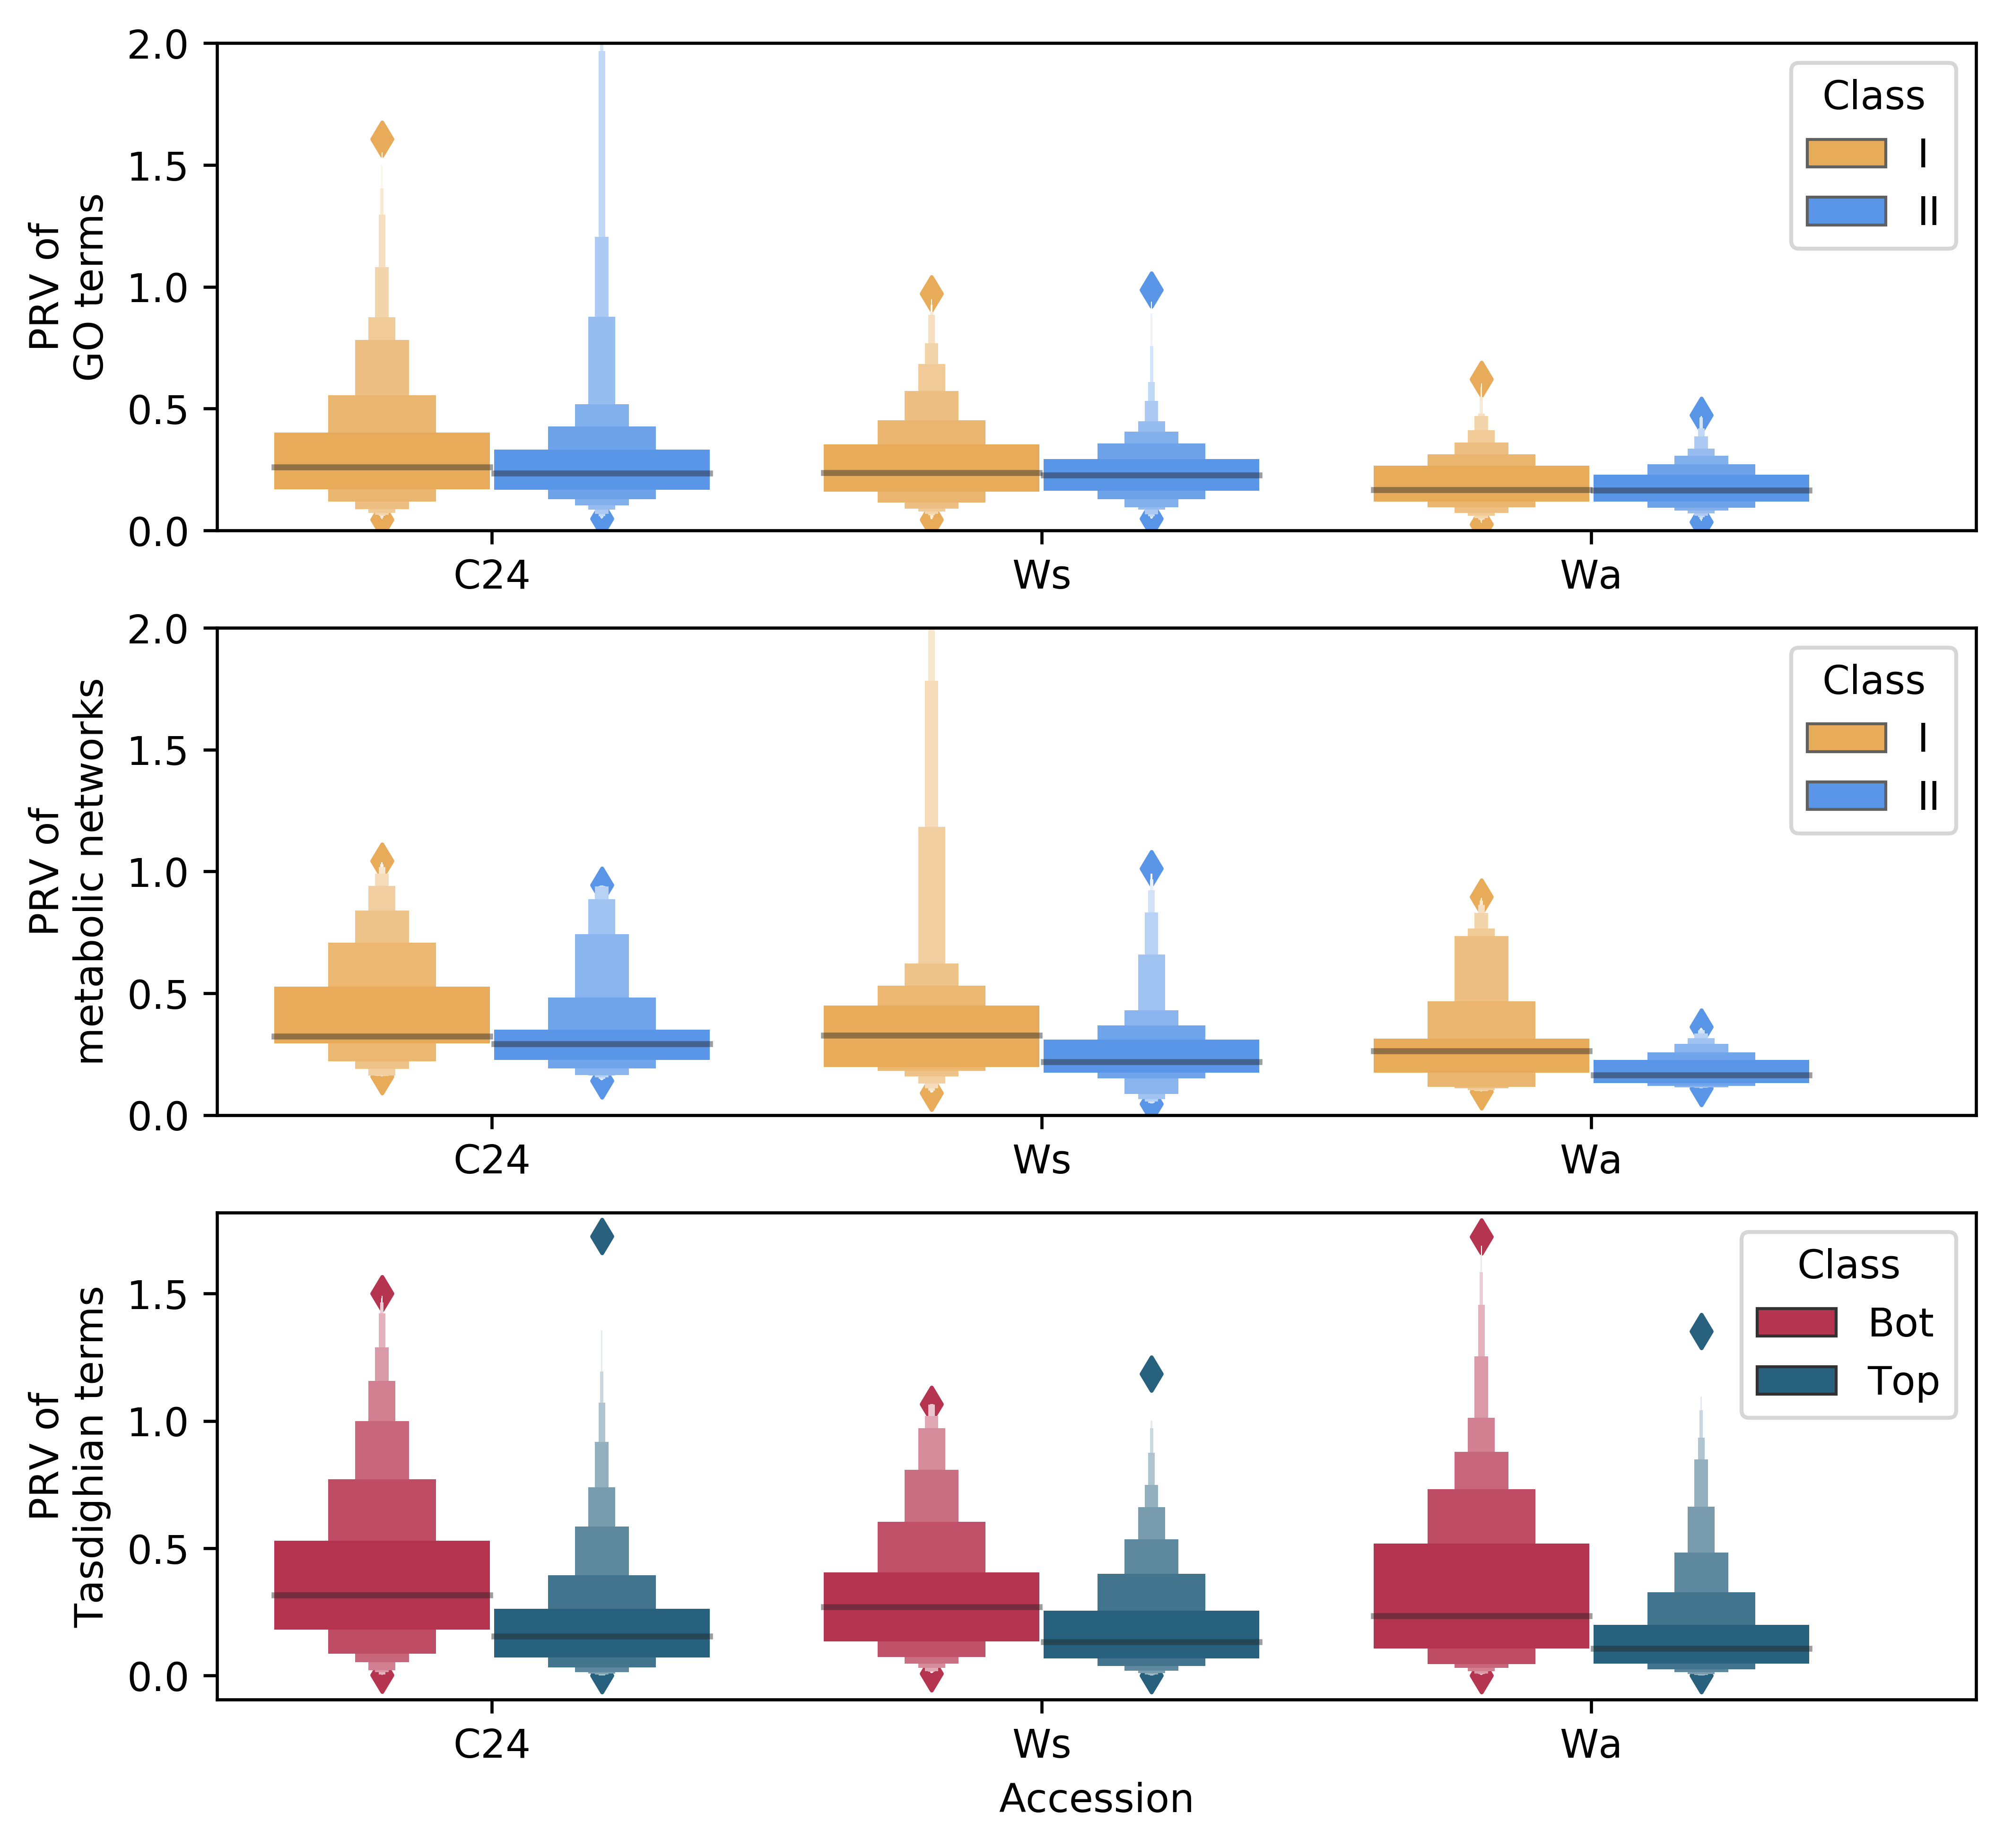

In [10]:
# Plot dosage responses
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,8), dpi=DPI, sharex=True)

###############################
#### Dosage Response Plots ####
###############################
sns.set_palette(class_colors)
ax1 = sns.boxenplot(x="Accession", y="PRV", 
                    hue="Class", data=go,
                    palette=class_colors,
                    ax=ax1,
                    order=["C24", "Ws", "Wa"])

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.get_xaxis().set_tick_params(direction='out')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlabel(' ')
ax1.set_ylim(0,2.)
ax1.set_ylabel('PRV of\nGO terms')
ax1.legend(title="Class", loc="upper right")


###############################
#### Dosage Response Plots ####
###############################

ax2 = sns.boxenplot(x="Accession", y="PRV", 
                    hue="Class", data=met,
                    palette=class_colors,
                    ax=ax2,
                    order=["C24", "Ws", "Wa"])

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.get_xaxis().set_tick_params(direction='out')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_ylabel('PRV of\nmetabolic networks')
ax2.set_xlabel(' ')
ax2.set_ylim(0,2.)
ax2.legend(title="Class", loc="upper right")

###############################
####       PRV Plots       ####
###############################
sns.set_palette(tf_colors)
ax3 = sns.boxenplot(x="Accession", y="PRV", 
                    hue="Class", data=tas,
                    palette=tf_colors,
                    ax=ax3,
                    order=["C24", "Ws", "Wa"])

ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax3.get_xaxis().set_tick_params(direction='out')
ax3.xaxis.set_ticks_position('bottom')
ax3.set_xlabel(' ')
ax3.set_ylabel('PRV of\nTasdighian terms')
ax3.legend(title="Class", loc="upper right")
ax3.set_xlabel('Accession')

ax3.set_xlim(-.5, 2.7)

# General plot tidying
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('../figures/figure3.png')

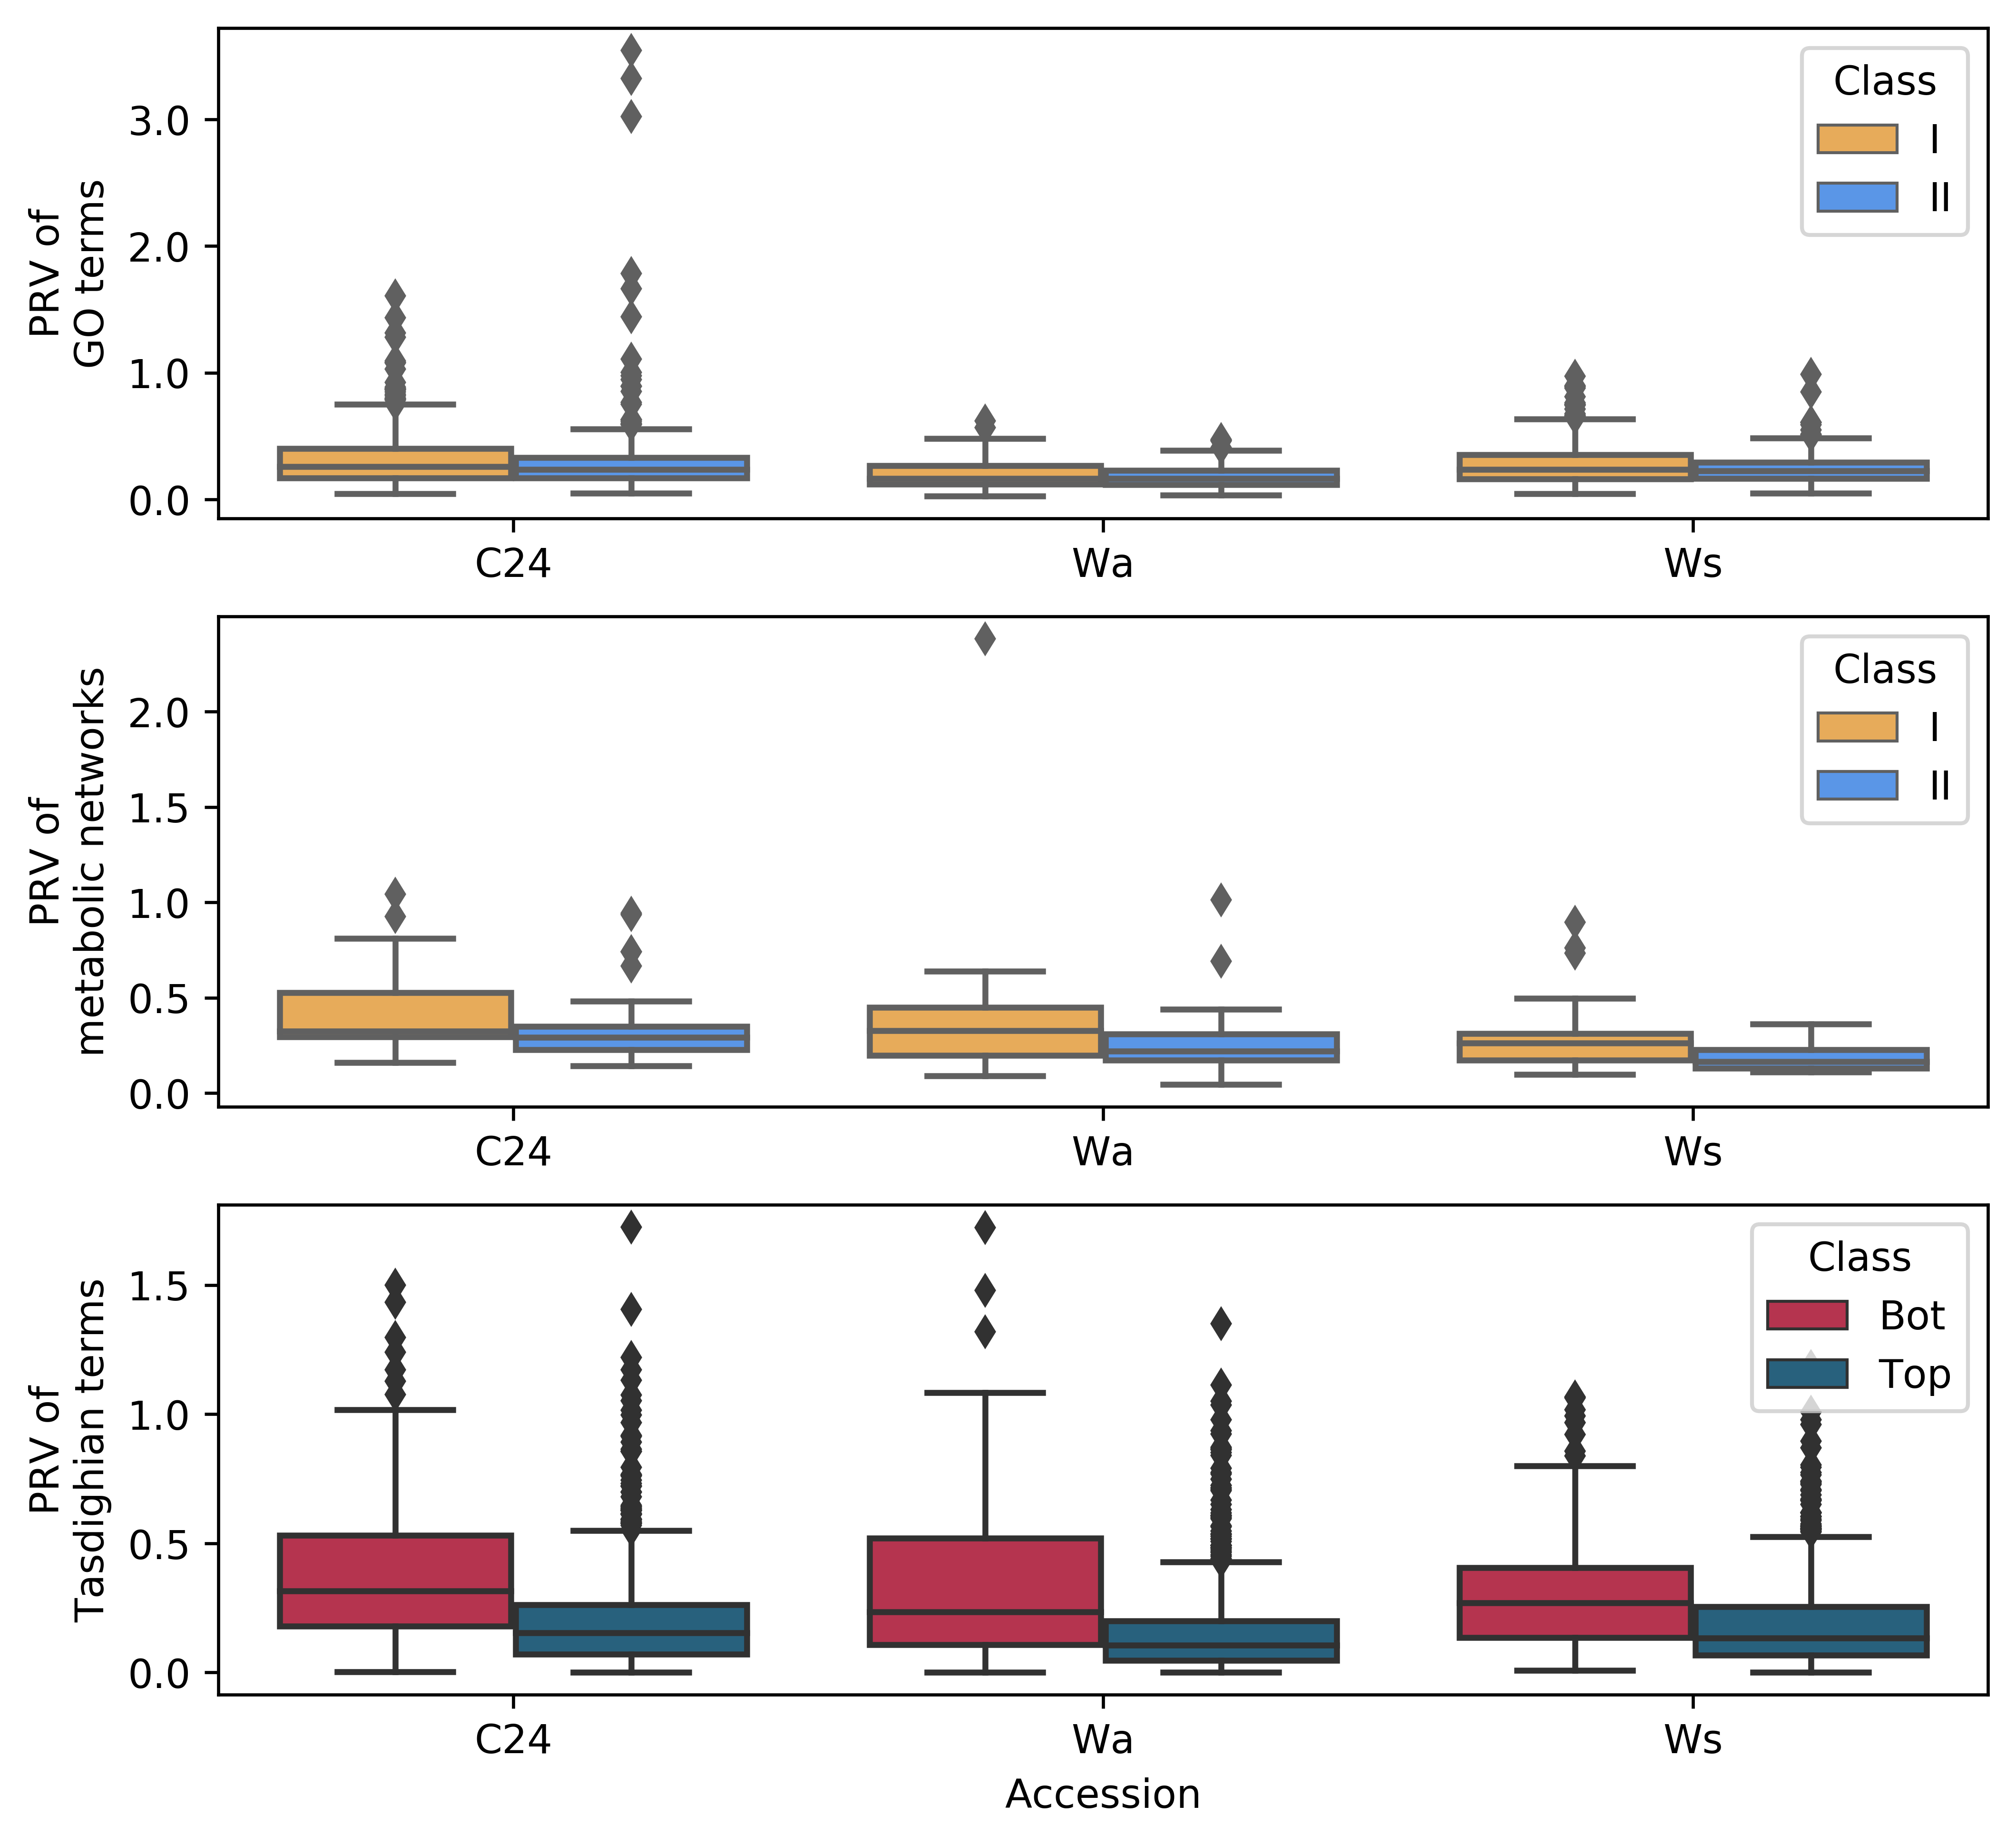

In [5]:
# Plot dosage responses
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,8), dpi=DPI, sharex=True)

###############################
#### Dosage Response Plots ####
###############################
sns.set_palette(class_colors)
ax1 = sns.boxplot(x="Accession", y="PRV", 
                    hue="Class", data=go,
                    palette=class_colors,
                    ax=ax1,)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.get_xaxis().set_tick_params(direction='out')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlabel(' ')
ax1.set_ylabel('PRV of\nGO terms')


###############################
#### Dosage Response Plots ####
###############################

ax2 = sns.boxplot(x="Accession", y="PRV", 
                    hue="Class", data=met,
                    palette=class_colors,
                    ax=ax2,)

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.get_xaxis().set_tick_params(direction='out')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_ylabel('PRV of\nmetabolic networks')
ax2.set_xlabel(' ')

###############################
####       PRV Plots       ####
###############################
sns.set_palette(tf_colors)
ax3 = sns.boxplot(x="Accession", y="PRV", 
                    hue="Class", data=tas,
                    palette=tf_colors,
                    ax=ax3)

ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax3.get_xaxis().set_tick_params(direction='out')
ax3.xaxis.set_ticks_position('bottom')
ax3.set_xlabel(' ')
ax3.set_ylabel('PRV of\nTasdighian terms')

ax3.set_xlabel('Accession')
# General plot tidying
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('../figures/all_prv_box.png')